In [2]:
pip install pandas

In [3]:
pip install black

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly
import plotly.express as px

In [5]:
coursera_data = pd.read_csv("C:\\Users\\Dell\\Desktop\\coursera_data.csv")

In [6]:
coursera_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                891 non-null    int64  
 1   course_title              891 non-null    object 
 2   course_organization       891 non-null    object 
 3   course_Certificate_type   891 non-null    object 
 4   course_rating             891 non-null    float64
 5   course_difficulty         891 non-null    object 
 6   course_students_enrolled  891 non-null    object 
dtypes: float64(1), int64(1), object(5)
memory usage: 48.9+ KB


In [ ]:
coursera_data.head()

,Unnamed: 0,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
0,134,(ISC)² Systems Security Certified Practitioner...,(ISC)²,SPECIALIZATION,4.7,Beginner,5.3k
1,743,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,COURSE,4.7,Intermediate,17k
2,874,A Crash Course in Data Science,Johns Hopkins University,COURSE,4.5,Mixed,130k
3,413,A Law Student's Toolkit,Yale University,COURSE,4.7,Mixed,91k
4,635,A Life of Happiness and Fulfillment,Indian School of Business,COURSE,4.8,Mixed,320k


This dataset contains mainly 6 columns and 890 course data:

course_title : Contains the course title.
course_organization : It tells which organization is conducting the courses.
course_Certificate_type : It has details about what are the different certifications available in courses.
course_rating : It has the ratings associated with each course.
course_difficulty : It tells about how difficult or what is the level of the course.
course_students_enrolled : It has the number of students that are enrolled in the course.

In [ ]:
df = pd.DataFrame(coursera_data)

# dropping the 'unnanmed' column
df = df.drop(columns=["Unnamed: 0"])

# checking if there are any null values
missing_values = df.isnull().sum()
print(missing_values)

course_title                0
course_organization         0
course_Certificate_type     0
course_rating               0
course_difficulty           0
course_students_enrolled    0
dtype: int64


In [9]:
# checking for duplicate values
print(df.duplicated().sum())

0


there are no missing values and no duplicates. Good for us!

In [ ]:
# checking what are the suffixes (like 'k' for thousands) in the last column
last_chars = df["course_students_enrolled"].str[-1]
unique_last_chars = last_chars.unique()
print(unique_last_chars)

['k' 'm']


it means that the column 'course_students_enrolled' only has data in thousands or millions but 
it's kept as a string. For the sake of analysis we need to convert the last column from string to integer.

In [ ]:
# converting the column with number of students to integer for further analysis
df["course_students_enrolled"] = (
    df["course_students_enrolled"]
    .replace({"k": "*1e3", "m": "*1e6"}, regex=True)
    .map(pd.eval)
    .astype(int)
)
df.head()

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
0,(ISC)² Systems Security Certified Practitioner...,(ISC)²,SPECIALIZATION,4.7,Beginner,5300
1,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,COURSE,4.7,Intermediate,17000
2,A Crash Course in Data Science,Johns Hopkins University,COURSE,4.5,Mixed,130000
3,A Law Student's Toolkit,Yale University,COURSE,4.7,Mixed,91000
4,A Life of Happiness and Fulfillment,Indian School of Business,COURSE,4.8,Mixed,320000


In [ ]:
# checking the top 10 organizations by the amount of courses offered
top_orgs = (
    df["course_organization"]
    .value_counts()
    .nlargest(10)
    .reset_index()  # Reset the index for a clean dataframe
)

# rename columns for better readability
top_orgs.columns = ["Organization", "Number of Courses"]

fig1 = px.bar(
    top_orgs,
    x="Organization",
    y="Number of Courses",
    title="Top 10 Organizations by Number of Courses",
    text="Number of Courses",
    color="Number of Courses",
    color_continuous_scale="greens",
)

# rotate labels for better readability
fig1.update_layout(xaxis_tickangle=-45)
fig1.show()

In [ ]:
# checking the top 15 courses by the number of students enrolled
top_courses = (
    df[["course_title", "course_students_enrolled"]]
    .sort_values(by="course_students_enrolled", ascending=False)
    .head(15)
)

# Limit course title to 30 characters and add '...' at the end
top_courses["course_title"] = top_courses["course_title"].apply(
    lambda x: x[:30] + "..." if len(x) > 30 else x
)

# сreate a horizontal bar chart using Plotly Express
fig = px.bar(
    top_courses,
    y="course_title",
    x="course_students_enrolled",
    title="Top 15 Courses by Students Enrolled",
    text="course_students_enrolled",
    template="plotly_white",
)

# customize the layout for better readability
fig.update_layout(
    xaxis_title="Number of Students Enrolled",
    yaxis_title=None,  # no title for the y axis (course names are self-explanatory)
    showlegend=False,
    yaxis=dict(autorange="reversed"),
    height=600,
)

fig.show()

we see that courses on programming, English and business skills are on demand. But also we see that the 2nd place is taken by 'Well-being' course which may mean that people wanna know more about the ways of filling better or may be that this course was somehow actively promoted.

In [ ]:
# let's check the distribution of ratings
fig = px.histogram(
    df,
    x="course_rating",
    nbins=20,
    title="Distribution of Course Ratings",
    labels={"course_rating": "Course Rating"},
    color_discrete_sequence=["seagreen"],
)
fig.update_layout(bargap=0.1)
fig.show()

# the distribution is left-skewed; users tend to leave positive ratings (only 6 ratings are <= 4)

Hypothesis 1: Higher-rated courses have more students enrolled

Rationale: It's likely that students trust and enroll in courses that have received better reviews from past participants.

Approach:
- Use a scatter plot to compare 'course_rating' vs 'course_students_enrolled'.
- Calculate and visualize correlation using 'df.corr()'.

Expected Outcome: A positive correlation between rating and student count.

In [12]:
numeric_df = df.select_dtypes(include=["number"])
correlation_matrix = numeric_df.corr()
print(correlation_matrix)

                          course_rating  course_students_enrolled
course_rating                   1.00000                   0.07109
course_students_enrolled        0.07109                   1.00000


the correlation is quite weak so we can assume that there are some other factors impacting the choice of the course like: topic, organization, instructor, duration etc. Also newer courses may have lower amount of students. 
Let's see the scatter plot to confirm the correlation. 

In [ ]:
fig = px.scatter(
    df,

    x="course_rating",

    y="course_students_enrolled",

    title="Course Rating vs. Students Enrolled",

    labels={

        "course_rating": "Course Rating",

        "course_students_enrolled": "Students Enrolled",

    },

    opacity=0.7,

    template="plotly_white",
)


fig.show()

in the chart above we definitely see some outliers which make the chart not very clear. Let;s remove the outliers and build the scatterplot without them. 

In [ ]:
# Calculate IQR for 'course_students_enrolled'
Q1 = df["course_students_enrolled"].quantile(0.25)
Q3 = df["course_students_enrolled"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
df_filtered = df[
    (df["course_students_enrolled"] >= lower_bound)
    & (df["course_students_enrolled"] <= upper_bound)
]

# \Create the scatter plot with trendline
fig = px.scatter(
    df_filtered,
    x="course_rating",
    y="course_students_enrolled",
    trendline="ols",
    title="Course Rating vs Enrollments (Without Outliers)",
    labels={"course_rating": "Rating", "course_students_enrolled": "Enrolled Students"},
    opacity=0.7,
    template="plotly_white",
)

fig.show()

the scatterplot confirms that there is positive correlation between rating and amount of students but it's quite weak. 

Hypothesis 2: The biggest target audience is beginners

Rationale: Online learning platforms like Coursera aim to make education accessible. As a result, many users may be just starting their learning journey. This could encourage organizations to create more beginner-level courses to attract a wider audience.

Approach:
- Count how many courses fall under each course_difficulty level.
- Visualize the results using a bar chart.
- compare average enrollments per difficulty level to see if beginner courses are also more popular.

Expected Outcome:
We expect to find that a large proportion of courses are labeled as Beginner, indicating they are designed for people new to the subject.

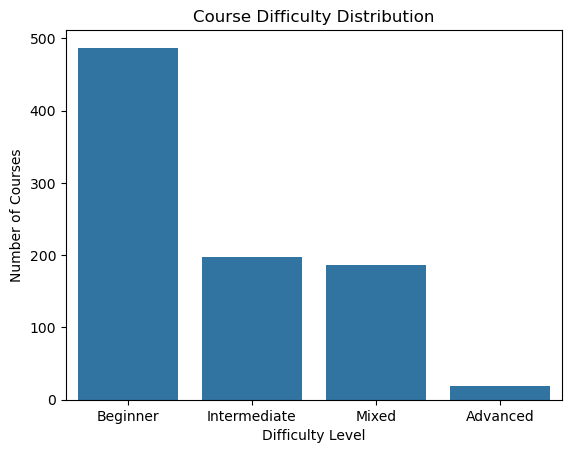

In [ ]:
sns.countplot(
    data=df, x="course_difficulty", order=df["course_difficulty"].value_counts().index
)
plt.title("Course Difficulty Distribution")
plt.xlabel("Difficulty Level")
plt.ylabel("Number of Courses")
plt.show()

C:\Users\Dell\AppData\Local\Temp\ipykernel_16440\3085089407.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




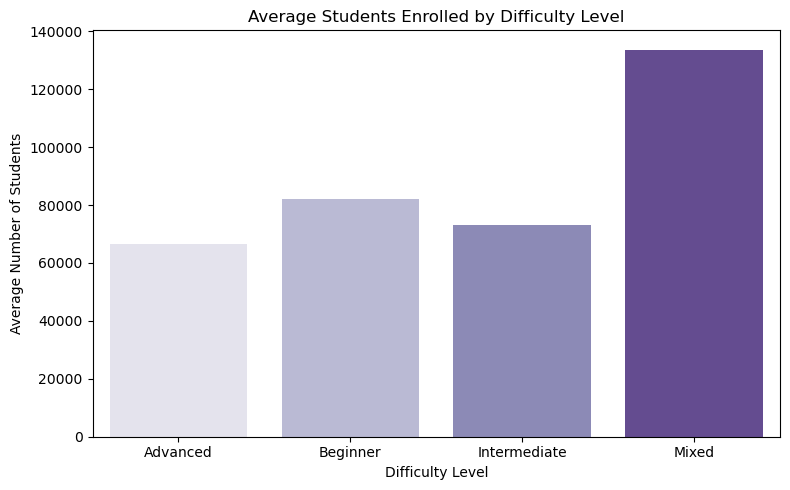

In [ ]:
avg_enroll = (
    df.groupby("course_difficulty")["course_students_enrolled"].mean().reset_index()
)

plt.figure(figsize=(8, 5))
sns.barplot(
    data=avg_enroll,
    x="course_difficulty",
    y="course_students_enrolled",
    palette="Purples",
)

plt.title("Average Students Enrolled by Difficulty Level")
plt.xlabel("Difficulty Level")
plt.ylabel("Average Number of Students")
plt.tight_layout()
plt.show()

THe hypothesis is confirmed by the first visualization (the biggest amount of courses is dedicated for beginners) while the second visualization shows that the most students on average are enrolled in the mixed difficulty courses. 

Hypothesis 3:
Courses offering certificates tend to have higher enrollments on average.

Rationale:
Certificates can be important to learners — especially for career-related courses. Learners might be more likely to enroll in and rate higher those courses that offer a certificate upon completion. Employers also value certificates, which may drive more interest in such courses.

Approach:
- Group the dataset by course_Certificate_type.
- Calculate the average course_rating and course_students_enrolled for each certificate type.
- Visualize the results using bar charts to compare certificate types side by side.

In [ ]:
avg_enrollment = (
    df.groupby("course_Certificate_type")["course_students_enrolled"]
    .mean()
    .reset_index()
    .rename(
        columns={
            "course_Certificate_type": "Certificate Type",
            "course_students_enrolled": "Average Enrolled",
        }
    )
)

fig = px.bar(
    avg_enrollment,
    x="Certificate Type",
    y="Average Enrolled",
    title="Average Student Enrollment by Certificate Type",
    text="Average Enrolled",
    color="Average Enrolled",
    color_continuous_scale="Tealgrn",
    template="plotly_white",
)

fig.update_layout(
    yaxis_title="Average Number of Students Enrolled", xaxis_title="Certificate Type"
)

fig.show()

We see that on average courses with professional certificate attract more enrollments. The hypothesis is confirmed. 